# Introduction

This project will be analyzing the data on GDP and life expectancy from the World Health Organization and the World Bank to support their case that there is a correlation or pattern between the GDP and life expectancy of a country.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp = pd.read_csv(r'C:\Users\Admin\Downloads\Life-Expectancy-and-GDP-Starter\all_data.csv')

In [3]:
gdp.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
gdp.isnull().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

In [5]:
gdp.duplicated().sum()

0

In [6]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [7]:
# rename the column

gdp.rename(columns={'Life expectancy at birth (years)':'LEABY'}, inplace=True)

In [8]:
gdp.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# What six countries are represented in the data?

In [9]:
gdp['Country'].value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64

# What years are represented in the data?

In [10]:
gdp['Year'].value_counts()

2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Year, dtype: int64

# Plot the graphs

[Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')]

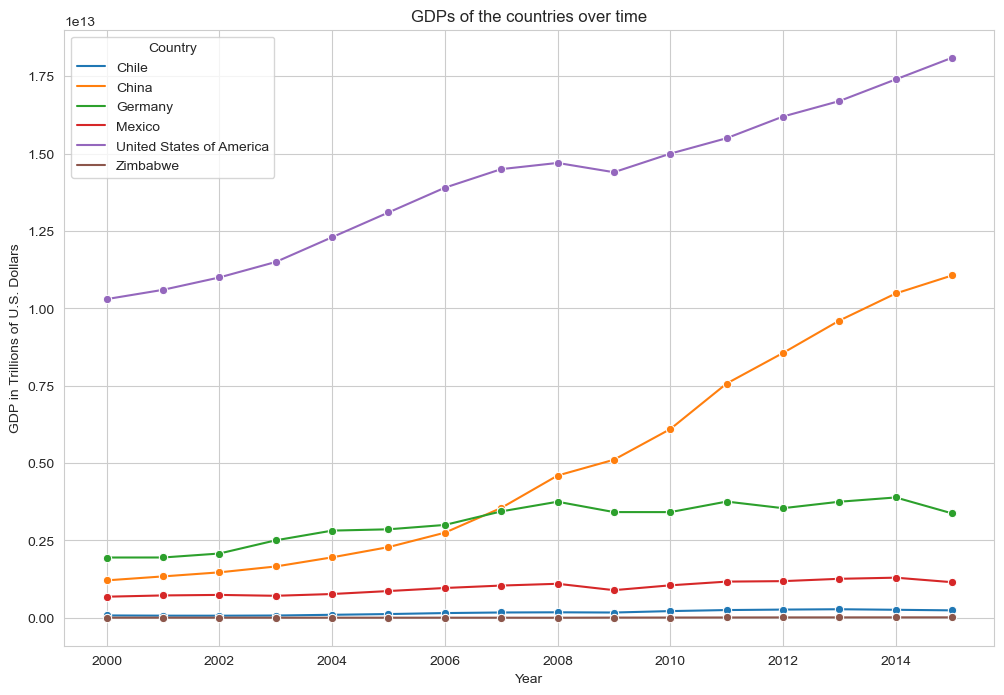

In [11]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(data=gdp, x='Year', y='GDP', hue='Country', marker='o')
ax.set_title('GDPs of the countries over time')
ax.set(ylabel='GDP in Trillions of U.S. Dollars')

[Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')]

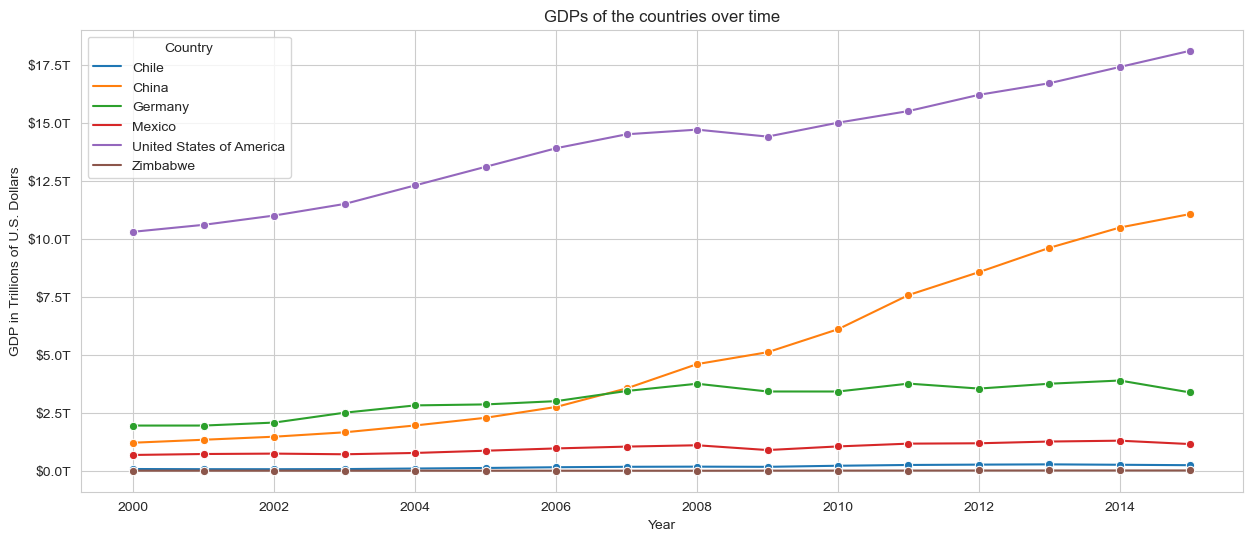

In [12]:
from matplotlib.ticker import FuncFormatter
def trillions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fT' % (x*1e-12)

formatter = FuncFormatter(trillions)

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.lineplot(data=gdp, x='Year', y='GDP', hue='Country', marker='o')
ax.set_title('GDPs of the countries over time')
ax.yaxis.set_major_formatter(formatter)
ax.set(ylabel='GDP in Trillions of U.S. Dollars')

### Observations:

##### 1. China has increase significantly in GDP over the years followed by United States of America.
##### 2. Zimbabwe and Chile has the least changes in GDP over the years.
##### 3. Overall, all countries have an increase in GDPs over the years.

[Text(0, 0.5, 'Life expectancy at birth (years)')]

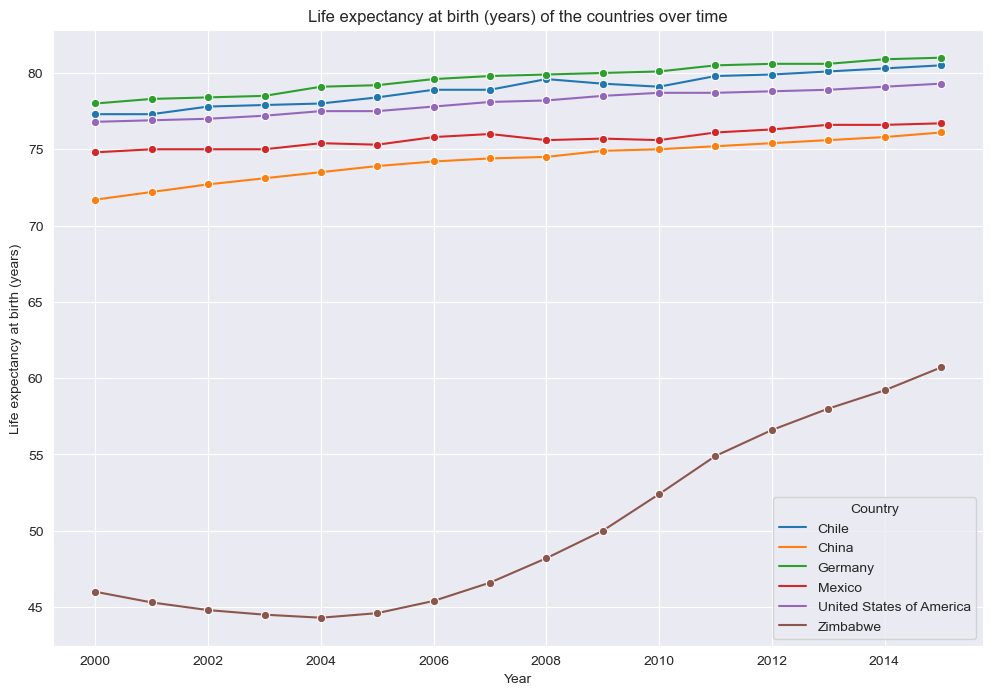

In [13]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(data=gdp, x='Year', y='LEABY', hue='Country', marker='o')
ax.set_title('Life expectancy at birth (years) of the countries over time')
ax.set(ylabel='Life expectancy at birth (years)')

### Observations:

##### 1. Zimbabwe has increase significantly in Life expectancy from around 40s to 60s.
##### 2. US has the least change in Life expectancy over the years.
##### 3. Overall, all countries have an increase in Life expectancy over the years, except a dip for Zimbabwe in 2004.

# Finding Correlation between GDP and Life Expectancy

[Text(0, 0.5, 'Life Expectancy at Birth (year)')]

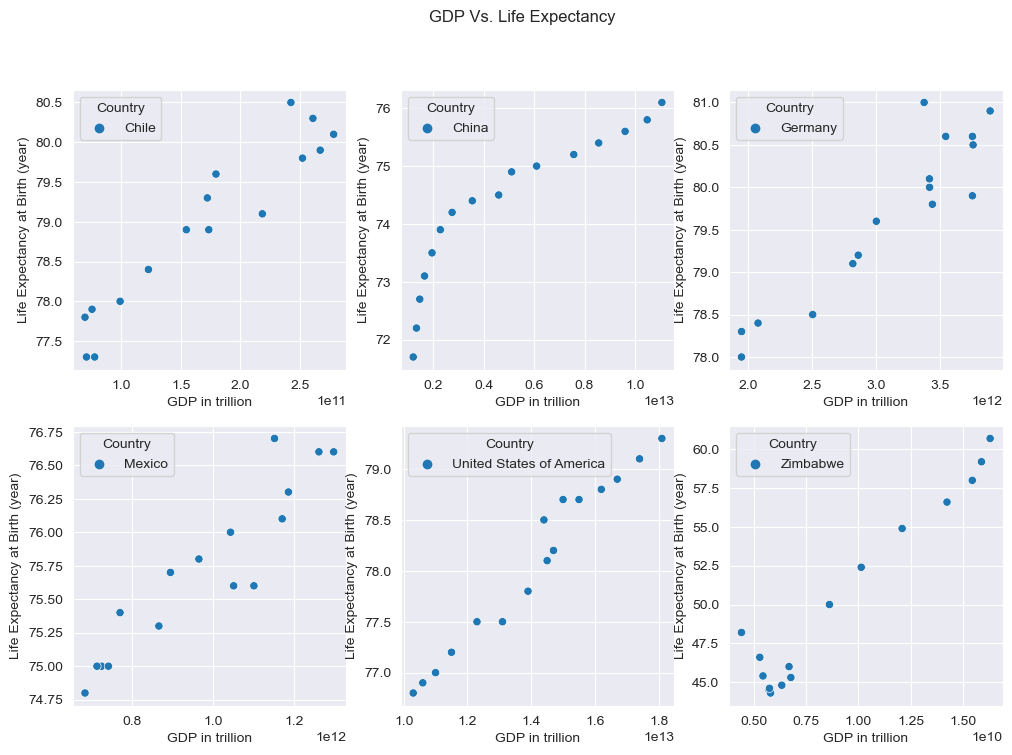

In [47]:
fig, axes = plt.subplots(2,3, figsize=(12,8))
                      
fig.suptitle('GDP Vs. Life Expectancy')
ax1 = sns.scatterplot(gdp[gdp['Country']=='Chile'], ax=axes[0,0], x='GDP', y='LEABY', hue='Country')
ax1.set(xlabel='GDP in trillion')
ax1.set(ylabel='Life Expectancy at Birth (year)')
        
ax2 = sns.scatterplot(gdp[gdp['Country']=='China'], ax=axes[0,1], x='GDP', y='LEABY', hue='Country')
ax2.set(xlabel='GDP in trillion')
ax2.set(ylabel='Life Expectancy at Birth (year)')

ax3 = sns.scatterplot(gdp[gdp['Country']=='Germany'], ax=axes[0,2], x='GDP', y='LEABY', hue='Country')
ax3.set(xlabel='GDP in trillion')
ax3.set(ylabel='Life Expectancy at Birth (year)')

ax4 = sns.scatterplot(gdp[gdp['Country']=='Mexico'], ax=axes[1,0], x='GDP', y='LEABY', hue='Country')
ax4.set(xlabel='GDP in trillion')
ax4.set(ylabel='Life Expectancy at Birth (year)')

ax5 = sns.scatterplot(gdp[gdp['Country']=='United States of America'], ax=axes[1,1], x='GDP', y='LEABY', hue='Country')
ax5.set(xlabel='GDP in trillion')
ax5.set(ylabel='Life Expectancy at Birth (year)')

ax6 = sns.scatterplot(gdp[gdp['Country']=='Zimbabwe'], ax=axes[1,2], x='GDP', y='LEABY', hue='Country')
ax6.set(xlabel='GDP in trillion')
ax6.set(ylabel='Life Expectancy at Birth (year)')

### Observations:

##### 1. Overall, all countries show a positive correlation between GDP and Life Expectancy.
##### 2. There is a dip for Zimbabwe, could be due to the drop of Life Expectancy in 2004. 

Text(0, 0.5, 'Life Expectancy at Birth (year)')

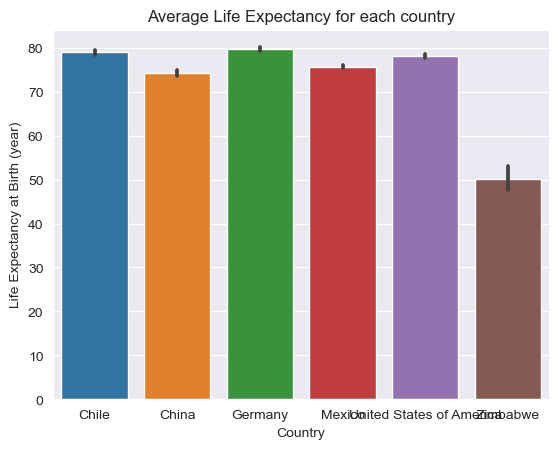

In [55]:
import numpy as np
ax = plt.subplot()
sns.barplot(data=gdp, x='Country', y='LEABY', estimator=np.mean)
ax.set_title('Average Life Expectancy for each country')
ax.set_ylabel('Life Expectancy at Birth (year)')

##### The average life expectancy for most countries range between 70s to 80s except for Zimbabwe where the range is 50s.

### Distribution of Life Expectancy

C:\Users\Admin\AppData\Local\Temp\ipykernel_14504\119737687.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gdp['LEABY'][gdp.Country == country], shade=True, label=country)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14504\119737687.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gdp['LEABY'][gdp.Country == country], shade=True, label=country)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14504\119737687.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gdp['LEABY'][gdp.Country == country], shade=True, label=country)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14504\119737687.py:4: FutureWarning: 

`shade` is now

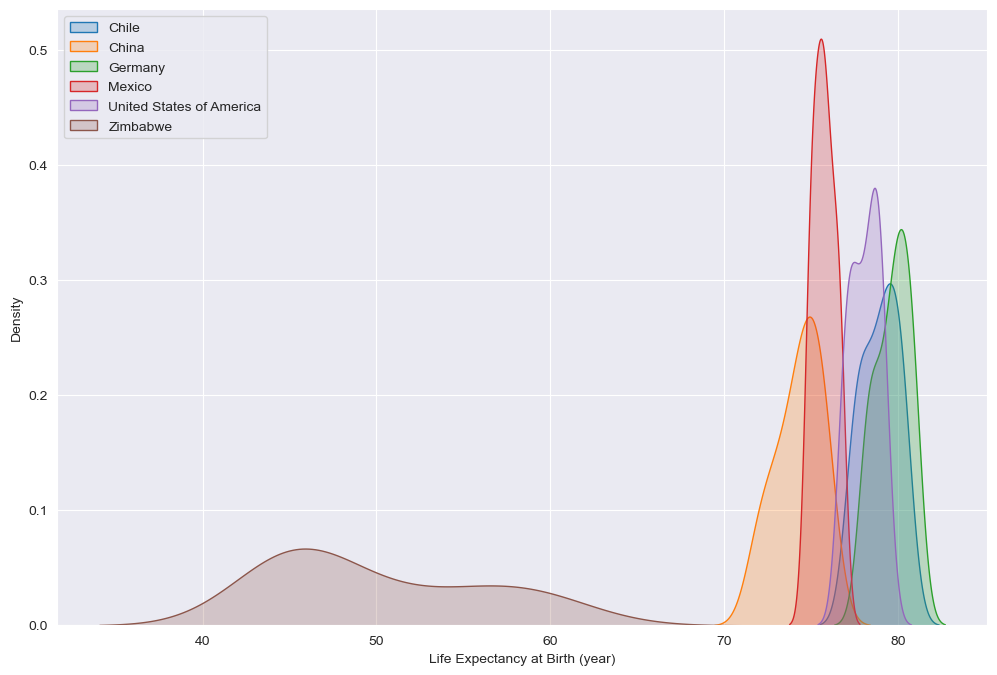

In [62]:
f, ax = plt.subplots(figsize=(12, 8))
countries = gdp.Country.unique()
for country in countries:
    sns.kdeplot(gdp['LEABY'][gdp.Country == country], shade=True, label=country)
ax.set_xlabel('Life Expectancy at Birth (year)')
plt.legend(loc=2)

### Conclusion:

##### 1. GDP and Life Expectancy have generally increase over time.
##### 2. There is a positive correlation between GDP and Life Expectancy.
##### 3. Life Expectancy in Zimbabwe has changed significantly over the years.